In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data
df = pd.read_csv("spamhamdata.csv", sep = '\t',header = None, names = ['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Data info

df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# finding duplicates
df.duplicated().sum()

np.int64(403)

In [77]:
df.shape

(5169, 3)

In [6]:
# dropping duplicates

df.drop_duplicates(inplace = True)

In [7]:
# finding spam counts

df.label.value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])

In [76]:
y = encoder.fit_transform(df['label'])
type(y)

numpy.ndarray

In [36]:
np.array(df['label'])

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [11]:
#exploring messages column

#importing spacy to perform the text preprocessing

import spacy

nlp = spacy.load("en_core_web_sm")

In [12]:
def text_processing(text):

    #lower letters
    text = text.lower()


    # removing punctuation and stop words
    cleaned_text = [token for token in nlp(text) if not token.is_stop and not token.is_punct]

    #stemming
    lemmas = [token.lemma_ for token in cleaned_text]

    return " ".join(lemmas)





In [13]:
df['text'] = df['message'].apply(text_processing)

In [14]:
print(df[:1].to_string())

   label                                                                                                          message                                                                             text
0      0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  jurong point crazy available bugis n great world la e buffet cine get amore wat


In [87]:
!pip install wordcloud -q
from wordcloud import WordCloud, STOPWORDS

DEPRECATION: Loading egg at c:\users\suryap.shekhawat\downloads\ss\spam_detection\venv\lib\site-packages\spam_detection_model-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
spamtext_string = ''.join(text for text in df[df['label']==1]['text'])

In [98]:
wordcloud = WordCloud(background_color="white",
        width=800,
        height=400,
        max_words=100,colormap='viridis').generate(spamtext_string)

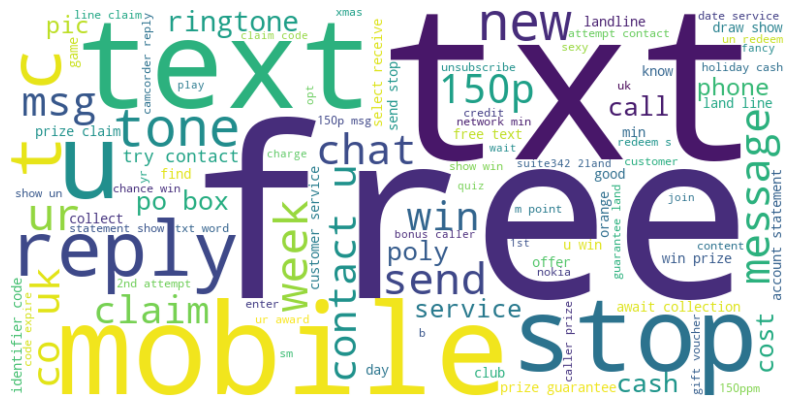

In [99]:
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(max_features = 100)

In [17]:
X = tfidf.fit_transform(df['text']).toarray()

In [18]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [19]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [20]:
#model training

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [21]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)


In [22]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'Adaboost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBT' : gbt,
    'XGB' : xgb
}

In [83]:
# !pip install flask
import flask

In [23]:
# model evaluation
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, X_test, y_train, y_test):
    model = clfs.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [51]:
model_report = {}
for Model_name, classifier in clfs.items():
    current_accuracy, current_precision = train_classifier(classifier, X_train, X_test, y_train, y_test)
    print(Model_name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    model_report[Model_name] = {
        'precision' : current_precision,
        'accuracy' : current_accuracy
    }
    print("\n===========")
    

SVC
Accuracy:  0.9564796905222437
Precision:  0.8818181818181818

KNN
Accuracy:  0.9642166344294004
Precision:  0.9509803921568627

NB
Accuracy:  0.9671179883945842
Precision:  0.9279279279279279

DT
Accuracy:  0.9390715667311412
Precision:  0.9024390243902439

LR
Accuracy:  0.9729206963249516
Precision:  0.954954954954955

RF
Accuracy:  0.9748549323017408
Precision:  0.9478260869565217

Adaboost
Accuracy:  0.9090909090909091
Precision:  0.8070175438596491

Bgc
Accuracy:  0.9729206963249516
Precision:  0.9316239316239316

ETC
Accuracy:  0.9748549323017408
Precision:  0.9557522123893806

GBT
Accuracy:  0.960348162475822
Precision:  0.9680851063829787

XGB
Accuracy:  0.9748549323017408
Precision:  0.9557522123893806



In [ ]:
best_model_name = max(model_report, key = lambda name : model_report[name]['accuracy'])
best_model_score = model_report[best_model_name]['accuracy']
print(best_model_score)
print(best_model_name)

0.9748549323017408
RF


In [79]:
clfs[best_model_name]

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
from datetime import datetime

print(f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log")

08_15_2025_16_45_41.log


In [ ]:
import os
os.makedirs(os.path.dirname(ingestion), exist_ok=True)

FileNotFoundError: [WinError 3] The system cannot find the path specified: ''